# Time Series Forescasting

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [4]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

sales = pd.read_csv('satallbor475.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
sales = pd.DataFrame(sales)
sales['meting'] = sales['meting'].multiply(1000)
sales = sales.head(1000)

In [5]:
sales.head()

,meting
datum,
2015-04-07,0.0
2015-04-07,0.0
2015-05-01,-9.4
2015-06-18,-3.8
2015-07-12,-9.9


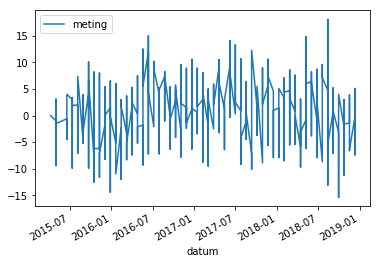

In [8]:
sales.plot()

Stationary means mean, variance and covariance is constant over periods.

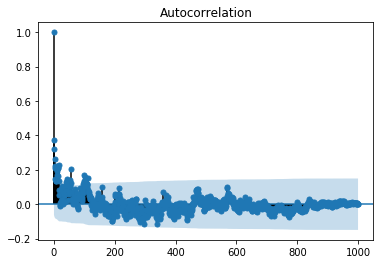

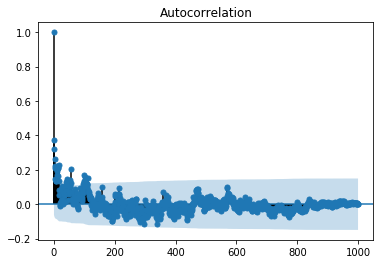

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

### Converting series to stationary

In [10]:
sales.head()

,meting
datum,
2015-04-07,0.0
2015-04-07,0.0
2015-05-01,-9.4
2015-06-18,-3.8
2015-07-12,-9.9


In [11]:
sales.shift(1)

,meting
datum,
2015-04-07,NaN
2015-04-07,0.0
2015-05-01,0.0
2015-06-18,-9.4
2015-07-12,-3.8
2015-08-05,-9.9
2015-08-29,3.0
2015-09-22,1.6
2015-10-16,-2.8


In [12]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [13]:
sales_diff = sales_diff[1:]
sales_diff.head()

,meting
datum,
2015-04-07,0.0
2015-05-01,-9.4
2015-06-18,5.6
2015-07-12,-6.1
2015-08-05,12.9


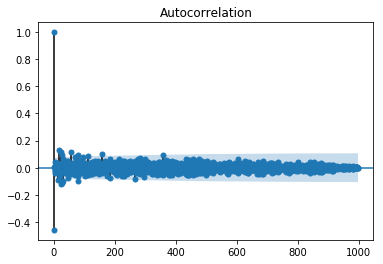

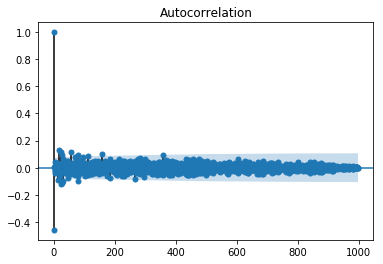

In [14]:
plot_acf(sales_diff)

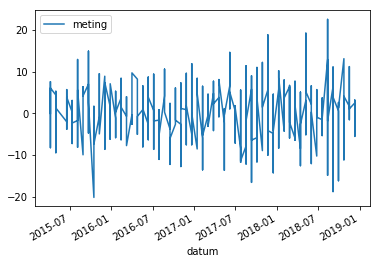

In [15]:
sales_diff.plot()

In [16]:
X = sales.values
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []

In [17]:
train.size

27

# Autoreggresive AR Model

In [18]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [19]:
predictions = model_ar_fit.predict(start=26,end=36)

In [20]:
test

array([[  1.4],
       [ -0.4],
       [  4.5],
       [  1.6],
       [ -0.3],
       [  7.2],
       [ -6.4],
       [  5.3],
       [  5.1],
       [ 10.7],
       [  5.2],
       [ -1.2],
       [ -3.7],
       [ -2.5],
       [  3.5],
       [  0.4],
       [ -7.9],
       [ -0.1],
       [  2. ],
       [ -3.7],
       [ -4.9],
       [ -6. ],
       [ -3.8],
       [ -1.2],
       [  2.5],
       [ -5.7],
       [  0.7],
       [-15.4],
       [ -2.3],
       [ -0.6],
       [ -5.3],
       [  0. ],
       [ -3.8],
       [ -2.3],
       [  0.5],
       [  3.3],
       [  7.4],
       [ -1.5],
       [  8. ],
       [ -0.6],
       [  6.5],
       [  4.6],
       [  2.6],
       [  3.1],
       [  1.7],
       [  7.5],
       [ -0.5],
       [  6.7],
       [  5. ],
       [  2.6],
       [  6. ],
       [  4.1],
       [  2.3],
       [  9.6],
       [  2.1],
       [  1.6],
       [  1.6],
       [  8.1],
       [  5. ],
       [  0.9],
       [  1.5],
       [  1.2],
       [

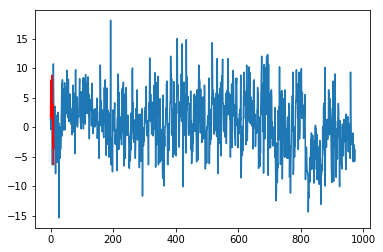

In [21]:
plt.plot(test)
plt.plot(predictions,color='red')

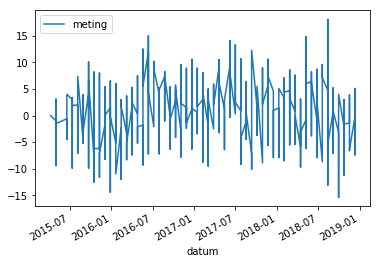

In [22]:
sales.plot()

# ARIMA model

In [23]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

C:\Users\thoma\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\thoma\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\thoma\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

LinAlgError: SVD did not converge

In [ ]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')

In [25]:
mean_squared_error(test,predictions)

ValueError: Found input variables with inconsistent numbers of samples: [974, 11]

In [26]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [27]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 157.7684834769054
(0, 0, 1) 159.44109781703207
(0, 0, 2) 159.06021287828491
(0, 0, 3) 160.726313929865
(0, 0, 4) 162.44433742660476
(0, 1, 0) 167.1677848460752
(0, 1, 1) 153.6091401788011
(0, 1, 2) 155.60262377780157
(0, 2, 0) 189.75168442763177
(0, 2, 1) 167.07805181243606
(1, 0, 0) 159.30856563366245
(1, 1, 0) 158.78079690909783
(1, 1, 1) 155.6013745336577
(1, 2, 0) 168.2715745219384
(1, 2, 1) 159.3910566328775
(1, 2, 2) 171.07880081353395
(1, 2, 3) 160.78261945675553
(2, 0, 0) 160.22463071420938
(2, 1, 0) 160.69907131334924
(2, 1, 1) 157.30248340702929
(2, 1, 2) 159.60497126015093
(2, 2, 0) 168.34130956403266
(2, 2, 1) 161.3634166822684
(2, 2, 2) 160.1578779332795
(3, 0, 0) 159.85003138824368
(3, 0, 1) 161.80400667082807
(3, 0, 2) 166.85013474678942
(3, 0, 3) 163.89876815164138
(3, 1, 0) 160.37890076869724
(3, 1, 1) 156.32437984511608
(3, 1, 2) 161.30480128929378
(3, 2, 0) 167.67458202653285
(3, 2, 1) 161.49724527676324
(3, 2, 2) 165.36864858039309
(4, 0, 0) 161.7909727175